In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/Shareddrives/2022 DOUTORADO Larissa Rodrigues/6 CRISP API/AUDIO/Doritos

/content/drive/Shareddrives/2022 DOUTORADO Larissa Rodrigues/6 CRISP API/AUDIO/Doritos


In [7]:
!ls

dados.xlsx	 DoritosD027.wav  DoritosD112.wav  DoritosD235.wav
DoritosD022.wav  DoritosD098.wav  DoritosD130.wav
DoritosD023.wav  DoritosD099.wav  DoritosD189.wav
DoritosD026.wav  DoritosD100.wav  DoritosD192.wav


In [8]:
# Replace 'file' with the actual path to your audio file
file = 'DoritosD023.wav'

#get the original sample rate
import librosa
srread = librosa.get_samplerate(file)
print(srread)

44100


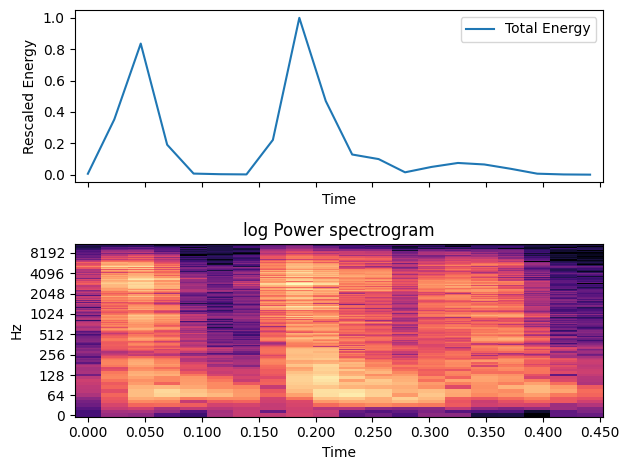

Average Power = (Area under RMS curve) / (Time Duration): 0.1873708939577446


In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

y, sr = librosa.load(file, sr=44100, duration=1.0)
time = np.arange(0, len(y)) / sr

# Ad. energia Sonora
# Compute the energy of each frame
S, phase = librosa.magphase(librosa.stft(y))
power = librosa.feature.rms(S=S)**2 ##calcula a media do power spectrum
#print(power)

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Rescale your array
power_rescaled = scaler.fit_transform(power.reshape(-1, 1)).flatten()
#print(rms_rescaled)

# Plot the rescaled RMS energy values
fig, ax = plt.subplots(nrows=2, sharex=True)

times = librosa.times_like(power)
ax[0].plot(times, power_rescaled, label='Total Energy')
ax[0].set_yscale('linear')  # Set y-axis scale to linear
ax[0].set(ylabel='Rescaled Energy')
ax[0].set_xlabel('Time')
ax[0].legend()

# Assuming 'S' is your spectrogram data
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

plt.tight_layout()
# Get the current working directory
original_directory = os.getcwd()
# Move up to the parent directory
os.chdir("..")
# Specify the filename for the figure
figure_filename = f'{file}.png'
# Save the figure in the parent directory
plt.savefig(figure_filename)
# Return to the original directory
os.chdir(original_directory)
# Show the plot
plt.show()

# Calculate the numerical integration of RMS values over time (trapezoidal rule)
integration_area = np.trapz(power_rescaled, times)
energy_area = integration_area/np.max(times)
#print("Numerical Integration of RMS rescaled:", integration_result)
print("Average Power = (Area under RMS curve) / (Time Duration):", energy_area)

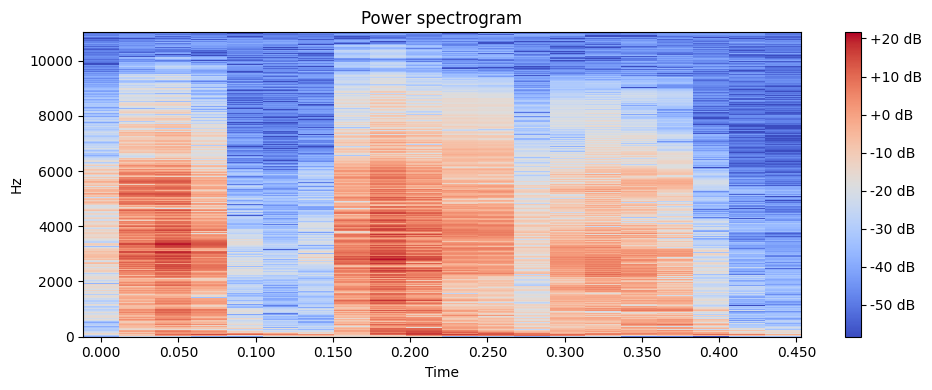

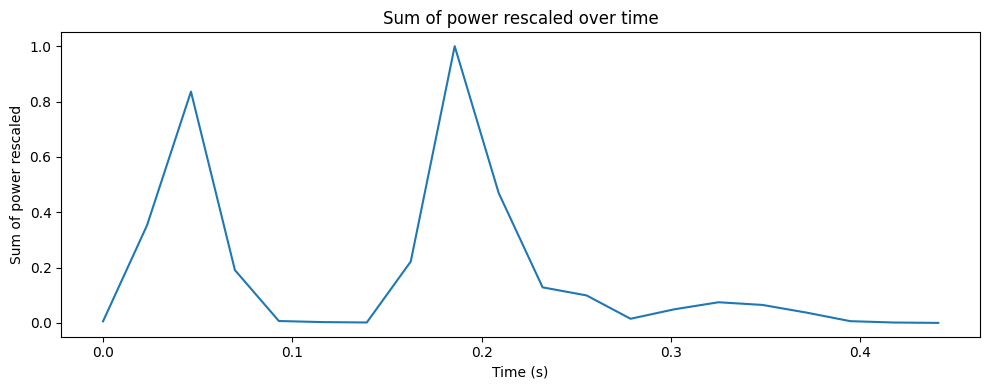

Average Power = (Area under Power curve) / (Time Duration): 0.18737074102912293


In [ ]:
# Compute power spectrum
S = librosa.stft(y)
power = librosa.power_to_db(np.abs(S)**2)
# Compute power spectrum
#S = librosa.stft(y)
#power = np.abs(S)**2

# Visualize power spectrum
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(power, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Power spectrogram')
plt.tight_layout()
plt.show()

# Compute power spectrum
#S = librosa.stft(y)
#power = librosa.power_to_db(np.abs(S)**2)
# Compute power spectrum
S = librosa.stft(y)
#power = 10*np.log10(np.abs(S)**2)
power = np.abs(S)**2

# Define time range of interest (in seconds)
start_time = 0.0
times = librosa.times_like(power)
end_time = np.max(times)
#print(times)
# Get length of times array
times_length = times.shape[0]
#print('Length of power array:', times_length)

# Sum power over time range
sum_power = np.sum(power[:, :times_length], axis=0)
#print(sum_power)
#print(sum_power.shape[0])

# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Rescale your array
power_rescaled = scaler.fit_transform(sum_power.reshape(-1, 1)).flatten()
#print(rms_rescaled)

# Visualize sum of power
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(librosa.core.times_like(power_rescaled), power_rescaled)
plt.xlabel('Time (s)')
plt.ylabel('Sum of power rescaled')
plt.title('Sum of power rescaled over time')
plt.tight_layout()
plt.show()

# Calculate the numerical integration of RMS values over time (trapezoidal rule)
integration_area = np.trapz(power_rescaled, times)
energy_area = integration_area/np.max(times)
#print("Numerical Integration of Power rescaled:", integration_result)
print("Average Power = (Area under Power curve) / (Time Duration):", energy_area)